
# ДЗ 8. ML для бизнеса

__1.__ [Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте.](#task01)

__2.__ [Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc). Например](#task02)

__3.__ [Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке).](#task03)

__4.__ [Обучить базовую модель (любую - на ваш выбор). При этом нужно использовать cross validation](#task04)

__5.__ [Посчитайте разные метрики качества на cross-validation, отрисуйте графики (roc auc)](#task05)

__6.__ [Сделать подбор гиперпараметров с помощью той же самой cross-validation.](#task06)

__7.__ [Сохраните вашу модель на диск](#task07)

__8.__ [(в отдельном ноутбуке!) Загрузите ваш отложенный на шаге 1 датасет и сохраненные ранее файлы и сделайте прогноз моделью.](#task08)

__9.__ [Посчитайте метрики качества и сделайте выводы о том, насколько прогнозы (качество) на «новых» данных отличаются от того, что вы видели на cross-validation. Если будут очень серьезные отличия, то подумайте, где вы ошиблись и как это можно поправить.](#task09)

__10.__ [Бонусный вопрос: у вас есть на выбор два варианта разделения вашего исходного датасета - на train/test и на train/test/val. Подумайте, в каких ситуациях предпочтительнее один или второй вариант либо всегда лучше какой-то один? Какой бы выбрали вы?](#task10)

По методам отбора признаков ссылки:
1. пакет boruta (shadow attributes) - https://github.com/scikit-learn-contrib/boruta_py Там же ссылка на оригинальную статью
2. мега-статья с разбором множества методов отбора признаков (будет круто изучить хотя бы поверхностно) - https://arxiv.org/pdf/1601.07996.pdf

In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)

/Users/artem/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from random import randint

## Задание 1

Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте.

Загрузим датасет по ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

In [3]:
# ссылка впоследствии перестала работать, поэтому подгружать датасет впоследствии пришлось из файла
# try:
#     path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
#     print('dataset from link')
# except:
#     path = 'online_shoppers_intention.csv'
#     print('dataset from file')

path = 'online_shoppers_intention.csv'
data = pd.read_csv(path, sep=',')

Обзорный взгляд на датасет:

In [4]:
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Создавать отложенную выборку на этом этапе пока нет смысла, т.к. мы даже не знаем, какие преобразования признаков потребуются, и лучше их сразу сделать на всё датасете, а уже потом разделять датасет

In [6]:
# таргет изменим на формат "1"/"0" вместо формата True/False
data['Revenue'] = data['Revenue'].replace({True:1, False:0})

В дальнейшем была обнаружена ошибка при использовании пайплайнов (которая съела много времени), заключающаяся в том, что в тестовую выборку могли не попасть те значения, из которых потом будут создаваться новые дамми-признаки. Например, если признак "x" может принимать значения "1", "2", "3", то по итогам применения пайплайнов к трейн-выборке, происходит генерация признаков "x_1", "x_2", "x_3", но если в тестовой выборке признак "x" будет принимать только одно значение (например, "1") , то будет создан только один признак "x_1".

В частности, обнаружилось, что признак "Browser" имеет такие значения, что при некоторых разбивках, не все значения попадают в тестовую выборку, поэтому только ради того, чтобы выполнить ДЗ, пришлось применить очень кривые костыли, а по-хорошему, с этим, конечно, надо разбираться по-нормальному, т.е. это не решение задачи, а способ сдать домашку в приемлемые сроки :)

Итак, я вынужден удалить все значения признаков, которые встречаются реже чем 20 на датасет. Определим такие признаки:

In [7]:
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

* значения признака "Browser" равное 12, 11, 9 удалить из датафрейма

In [8]:
df_to_drop1 = data.loc[(data['Browser']==9) |(data['Browser']==11) | (data['Browser']==12)]
list(df_to_drop1.index) #list(data_top.index)

[284,
 3050,
 6236,
 6316,
 7969,
 7980,
 8185,
 8749,
 9025,
 9184,
 9523,
 10531,
 10556,
 10617,
 11188,
 12130,
 12314]

In [9]:
data.drop(list(df_to_drop1.index), inplace=True)

In [10]:
data['TrafficType'].value_counts()

2     3909
1     2445
3     2049
4     1069
13     738
10     450
6      443
8      342
5      260
11     246
20     198
9       42
7       40
15      38
19      17
14      12
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [11]:
df_to_drop2 = data.loc[(data['TrafficType']==19) |(data['TrafficType']==14) | (data['TrafficType']==18)|
                       (data['TrafficType']==16)|(data['TrafficType']==12)|(data['TrafficType']==17)]
list(df_to_drop2.index) #list(data_top.index)

[219,
 462,
 518,
 2123,
 2211,
 2424,
 2575,
 2640,
 2674,
 2683,
 2695,
 2699,
 2703,
 2731,
 2775,
 2817,
 2834,
 2848,
 2855,
 3160,
 3581,
 3602,
 3665,
 3748,
 3834,
 3850,
 3949,
 4186,
 4253,
 4288,
 4338,
 4387,
 4394,
 4480,
 4483,
 4554,
 4643,
 4858,
 5077,
 5152,
 5186,
 5225,
 5296,
 7350]

In [12]:
data.drop(list(df_to_drop2.index), inplace=True)

In [13]:
data['TrafficType'].value_counts()

2     3909
1     2445
3     2049
4     1069
13     738
10     450
6      443
8      342
5      260
11     246
20     198
9       42
7       40
15      38
Name: TrafficType, dtype: int64

In [14]:
data['OperatingSystems'].value_counts()

2    6572
1    2581
3    2534
4     477
8      79
6      19
7       7
Name: OperatingSystems, dtype: int64

In [15]:
df_to_drop3 = data.loc[(data['OperatingSystems']==6) |(data['OperatingSystems']==7)]
list(df_to_drop3.index) #list(data_top.index)

[260,
 883,
 2218,
 2414,
 2680,
 3207,
 3446,
 3458,
 4249,
 4531,
 5024,
 5128,
 5208,
 5377,
 5440,
 5561,
 7103,
 7244,
 7492,
 7772,
 9131,
 10316,
 10413,
 11082,
 11540,
 11996]

In [16]:
data.drop(list(df_to_drop3.index), inplace=True)

### Creating a holdout dataset (test)

Создадим отложенную выборку, которую мы не будем трогать до самого конца.

In [17]:
x_valid = data.iloc[10000:, :-1]
y_valid = data.iloc[10000:,-1]
x_valid.to_csv('x_valid.csv', sep=";", index=None)
y_valid.to_csv('y_valid.csv', sep=";", index=None)

In [18]:
data = data.iloc[:10000,:]

In [19]:
from sklearn.model_selection import train_test_split

target = 'Revenue'

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=target), data[target], test_size=0.33, random_state=42)

In [20]:
# # признаки
# x_train = data.iloc[:7500,:-1]
# x_test = data.iloc[7500:10000,:-1]
# x_valid = data.iloc[10000:, :-1]

In [21]:
# # таргеты
# y_train = data.iloc[:7500,-1]
# y_test = data.iloc[7500:10000,-1]
# y_valid = data.iloc[10000:,-1]

In [22]:
x_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
6314,0,0.000000,0,0.0,7,296.766667,0.000000,0.000000,0.000000,0.0,Aug,1,8,7,3,Returning_Visitor,False
4733,0,0.000000,0,0.0,5,217.000000,0.000000,0.020000,0.000000,0.0,May,2,5,6,6,Returning_Visitor,False
1737,0,0.000000,0,0.0,2,86.000000,0.000000,0.050000,0.000000,0.0,Mar,1,1,1,9,Returning_Visitor,True
4791,4,91.333333,0,0.0,27,759.085714,0.000000,0.007407,9.065333,0.0,May,1,10,1,3,Returning_Visitor,True
4569,0,0.000000,0,0.0,9,597.000000,0.111111,0.144444,0.000000,0.2,May,2,4,6,3,Returning_Visitor,False


Сохраняем тестовую и валидационную выборки в файлы

In [23]:
x_test.to_csv('test.csv', sep=";", index=None)
# x_valid.to_csv('valid.csv', sep=";", index=None)
x_train.to_csv('train.csv', sep=";", index=None)
y_test.to_csv('y_test.csv', sep=";", index=None)
# y_valid.to_csv('y_valid.csv', sep=";", index=None)
y_train.to_csv('y_train.csv', sep=";", index=None)

In [24]:
df = data.copy() # первоначальный датафрейм сохраняем под другим именем
data = pd.concat([x_train, y_train], axis=1)

## Задание 2. <a class='anchor' id='task02'></a>

Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc). Например

Проверим сбалансированность классов:

In [25]:
data['Revenue'].value_counts()

0    5724
1     976
Name: Revenue, dtype: int64

* Классы несбалансированы!

Общий взгляд на датасет:

In [26]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum()) #telcom.isnull().sum().values.sum()
print ("\nUnique values :  \n",data.nunique())

Rows     :  6700
Columns  :  18

Features : 
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Missing values :   0

Unique values :  
 Administrative               24
Administrative_Duration    2076
Informational                16
Informational_Duration      779
ProductRelated              248
ProductRelated_Duration    5409
BounceRates                1162
ExitRates                  2786
PageValues                 1487
SpecialDay                    6
Month                        10
OperatingSystems              5
Browser                      10
Region                        9
TrafficType                  14
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


Проверка на пустые ячейки, пробелы в строковых данных

In [27]:
all_cols = data.columns.tolist() # все столбцы сохраняем в список
counter = 0
for column in all_cols:
    indexes = data[data[column]==' '].index.tolist() # список индексов ячеек с пробелами
    indexes1 = data[data[column]==''].index.tolist()
    if (len(indexes)>0) or (len(indexes1)>0):
        item = {'column':column, 'indexes':indexes+indexes1}
        print(f'обнаружены пробелы и/или пустые ячейки: {item}')
        counter = counter +1
        
if counter == 0:
    print(f'пробелы и/или пустые ячейки не обнаружены!')

пробелы и/или пустые ячейки не обнаружены!


Проверим формат данных:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8442 to 7335
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           6700 non-null   int64  
 1   Administrative_Duration  6700 non-null   float64
 2   Informational            6700 non-null   int64  
 3   Informational_Duration   6700 non-null   float64
 4   ProductRelated           6700 non-null   int64  
 5   ProductRelated_Duration  6700 non-null   float64
 6   BounceRates              6700 non-null   float64
 7   ExitRates                6700 non-null   float64
 8   PageValues               6700 non-null   float64
 9   SpecialDay               6700 non-null   float64
 10  Month                    6700 non-null   object 
 11  OperatingSystems         6700 non-null   int64  
 12  Browser                  6700 non-null   int64  
 13  Region                   6700 non-null   int64  
 14  TrafficType          

* все данные находятся в форматах, подходящих для дальнейшей работы

Графическое отображение несбалансированности классов:

In [29]:
#labels
lab = data["Revenue"].value_counts().keys().tolist()
#values
val = data["Revenue"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data1 = [trace]
fig = go.Figure(data = data1,layout = layout)
py.iplot(fig)

### Data manipulation

#### определим количественные признаки и категориальные

In [30]:
# наименование столбца с таргетами
target_col = [data['Revenue'].name]

# категориальные столбцы:
num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated',
            'ProductRelated_Duration','BounceRates','ExitRates', 'PageValues']
cat_cols = [col_name for col_name in data.columns.tolist() if (col_name not in num_cols+target_col) ]

#### Разделим датасет на две части по условию принадлежности к меткам классов

In [31]:
data_1=data[data['Revenue']==True]
data_0=data[data['Revenue']==False]

In [32]:
#function  for pie plot for customer attrition types
def plot_pie(data_1, data_0, column) :
    
    trace1 = go.Pie(values  = data_1[column].value_counts().values.tolist(),
                    labels  = data_1[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "target 1",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = data_0[column].value_counts().values.tolist(),
                    labels  = data_0[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "target 0" 
                   )


    layout = go.Layout(dict(title = column + " distribution",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "target 1(yes)",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "target 0 (no)",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(data_1, data_0, column) :
    trace1 = go.Histogram(x  = data_1[column],
                          histnorm= "percent",
                          name = "target 1",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = data_0[column],
                          histnorm = "percent",
                          name = "target 0 customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df):
    
    df  = df.sort_values(by = "Revenue" ,ascending = True)
    classes = df["Revenue"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Revenue"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Revenue"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "BounceRates",
                                       values = df["BounceRates"]),
                                  dict(label  = 'ExitRates',
                                       values = df['ExitRates']),
                                  dict(label  = 'PageValues',
                                       values = df['PageValues'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

In [33]:
#for all categorical columns plot pie
for i in cat_cols:
    plot_pie(data_1, data_0, i)

Есть признак, в котором есть какое-то исчезающе малое кол-во одного значения:

In [34]:
(data['VisitorType']=='Other').value_counts()

False    6677
True       23
Name: VisitorType, dtype: int64

Посмотрим на количественные признаки:

In [35]:
#for all numerical columns plot histogram    
for i in num_cols :
    histogram(data_1, data_0, i)

## Задание 3 <a class='anchor' id='task03'></a>

Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке).

### Preprocess and feature engineering

### sklearn Transformers

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    трансформер для выбора одного столбца из датафрейма для того, чтобы сделать над ним изменения
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Трансформер для того, чтобы выбрать один столбец и произвести над ним преобразования - для
    количественных данных
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

In [37]:
num_cols, cat_cols
all_cols = cat_cols + num_cols
all_cols

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [38]:
# создаём новые признаки с помощью пайплайнов
from sklearn.pipeline import Pipeline

new_columns = []
for cat_feature in cat_cols:
    print(cat_feature)
    feature_object = Pipeline([
                ('selector', ColumnSelector(key=cat_feature)),
                ('ohe', OHEEncoder(key=cat_feature))
            ])
    new_columns.append(feature_object)

SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend


In [39]:
#new_columns[0]
new_columns[0].fit(x_test)
new_columns[0].transform(x_test)

,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
6314,1,0,0,0,0,0
4733,1,0,0,0,0,0
1737,1,0,0,0,0,0
4791,1,0,0,0,0,0
4569,0,1,0,0,0,0
...,...,...,...,...,...,...
1750,1,0,0,0,0,0
9830,1,0,0,0,0,0
6155,1,0,0,0,0,0
8853,1,0,0,0,0,0


In [40]:
from sklearn.preprocessing import StandardScaler

new_columns2 = []
for num_feature in num_cols:
    print(num_feature)
    feature_object =  Pipeline([
                ('selector', NumberSelector(key=num_feature)),
                ('standard', StandardScaler())
            ])
    new_columns2.append(feature_object)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues


In [41]:
new_feats = new_columns+new_columns2
new_feats[:2]

[Pipeline(steps=[('selector', ColumnSelector(key='SpecialDay')),
                 ('ohe', OHEEncoder(key='SpecialDay'))]),
 Pipeline(steps=[('selector', ColumnSelector(key='Month')),
                 ('ohe', OHEEncoder(key='Month'))])]

In [42]:
combined_feats = list(zip(all_cols, new_feats))
combined_feats[:2]

[('SpecialDay', Pipeline(steps=[('selector', ColumnSelector(key='SpecialDay')),
                  ('ohe', OHEEncoder(key='SpecialDay'))])),
 ('Month', Pipeline(steps=[('selector', ColumnSelector(key='Month')),
                  ('ohe', OHEEncoder(key='Month'))]))]

In [43]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(combined_feats)

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(x_train)

array([[ 1.        ,  0.        ,  0.        , ..., -0.44269909,
        -0.2591049 , -0.30945161],
       [ 1.        ,  0.        ,  0.        , ..., -0.46795629,
        -0.81785769, -0.30945161],
       [ 1.        ,  0.        ,  0.        , ..., -0.46795629,
        -0.04882158, -0.30945161],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.34027424,
         0.32127704, -0.30945161],
       [ 1.        ,  0.        ,  0.        , ..., -0.46795629,
        -0.21704824, -0.30945161],
       [ 1.        ,  0.        ,  0.        , ..., -0.34549712,
        -0.35978601, -0.30945161]])

## Задание 4 <a class='anchor' id='task04'></a>

Обучить базовую модель (любую - на ваш выбор). При этом нужно использовать cross validation

Чтобы выполнить кросс-валидацию, вернёмся к нашему первоначальному датасету В качестве эмуляции кросс-валидации буду использовать выборку из общего датасета на случайной основе

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    #print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    f1_w = f1_score(y_test, y_predict, average='weighted')
    #print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    #print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    #print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    #print("precision: %.2f%%" % (prc * 100.0)) 
    
    item = {'f1':f1, 'roc':roc, 'rec':rec,'prc':prc}
    
    return item

In [55]:
%%time
av_roc = 0
roc_sum = 0
for x in range(10): # создадим 10 разных выборок
    x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=target), data[target], test_size=0.33, random_state=randint(0,99))
    test_pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = randint(0,99))),])

    test_pipeline.fit(x_train, y_train)
    preds = test_pipeline.predict(x_test)
    
    
    roc_auc = (evaluate_results(y_test, preds))['roc']#(preds == y_test)
    roc_sum = roc_sum + roc_auc
    av_roc = roc_sum/(x+1)
    item ={'roc_auc':roc_auc, 'roc_sum':roc_sum, 'av_roc':av_roc}
    #print(item)

print(f'средний roc auc на 10 случайных выборках: {av_roc}\n\n')

средний roc auc на 10 случайных выборках: 0.7410088122822864


CPU times: user 8.89 s, sys: 256 ms, total: 9.14 s
Wall time: 12.2 s


## Задание 5 <a class='anchor' id='task05'></a>

Посчитайте разные метрики качества на cross-validation, отрисуйте графики (roc auc)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

def scoring_prediction(algorithm, training_x, training_y, testing_x,testing_y,predictions, 
                             probabilities ,cf,threshold_plot):
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["False","True"],
                        y = ["False","True"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [80]:
%%time
av_roc = 0
roc_sum = 0
for x in range(10): # создадим 10 разных выборок
    x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=target), data[target], test_size=0.33, random_state=randint(0,99))
    test_pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = randint(0,99))),])

    test_pipeline.fit(x_train, y_train)
    preds = test_pipeline.predict(x_test)
    
    roc_auc = np.mean(preds == y_test)
    roc_sum = roc_sum + roc_auc
    av_roc = roc_sum/(x+1)
    
    item = evaluate_results(y_test, preds)
    print(item)

{'f1': 0.6129032258064516, 'f1_weighted': 0.8948169119612046, 'roc': 0.744469280239285, 'rec': 0.5197568389057751, 'prc': 0.7467248908296943}
{'f1': 0.6190476190476191, 'f1_weighted': 0.8998557932063778, 'roc': 0.7525031142031166, 'rec': 0.5382165605095541, 'prc': 0.728448275862069}
{'f1': 0.5996131528046421, 'f1_weighted': 0.8982858611294198, 'roc': 0.7363229879011047, 'rec': 0.5, 'prc': 0.748792270531401}
{'f1': 0.6179775280898876, 'f1_weighted': 0.8983437991068377, 'roc': 0.7396331738437002, 'rec': 0.5, 'prc': 0.8088235294117647}
{'f1': 0.6014760147601476, 'f1_weighted': 0.8925374063431636, 'roc': 0.732024762409119, 'rec': 0.4880239520958084, 'prc': 0.7836538461538461}
{'f1': 0.643884892086331, 'f1_weighted': 0.9030011005981604, 'roc': 0.7576038587559392, 'rec': 0.5391566265060241, 'prc': 0.7991071428571429}
{'f1': 0.6333333333333334, 'f1_weighted': 0.9035948541681085, 'roc': 0.7553972430702988, 'rec': 0.5377358490566038, 'prc': 0.7702702702702703}
{'f1': 0.589090909090909, 'f1_weig


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1870
           1       0.78      0.48      0.59       341

    accuracy                           0.90      2211
   macro avg       0.85      0.73      0.77      2211
weighted avg       0.89      0.90      0.89      2211

Accuracy   Score :  0.8986883763003166
Area under curve :  0.7255045713299983 



/Users/artem/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



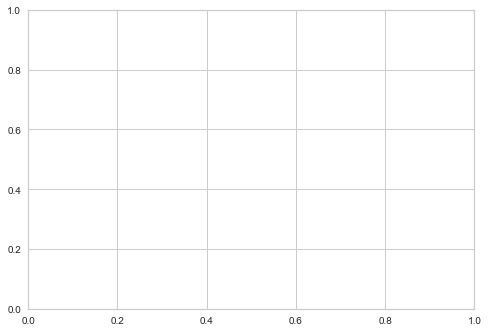

In [82]:
# отрисуем графики на последней из использовавшихся моделей
try:
    scoring_prediction(test_pipeline, x_train, y_train, x_test, y_test, preds, test_pipeline.predict_proba(x_test), "coefficients",threshold_plot = True)
except:
    pass

## Задание 6 <a class='anchor' id='task06'>

Сделать подбор гиперпараметров с помощью той же самой cross-validation.

In [90]:
%%time
res_list =[]
models=[]
trees_qty = [20,200]
depths = [5,10,20]
features_qty = [10,20,40]
counter = 0
for trees in trees_qty:
    for depth in depths:
        for features in features_qty:
            counter = counter +1
            av_roc = 0
            roc_sum = 0
            av_f1 = 0
            f1_sum = 0
            av_recall = 0
            rec_sum = 0
            av_precision = 0
            prec_sum = 0
            
            for x in range(10): # создадим 10 разных выборок
                x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=target), data[target], test_size=0.33, random_state=randint(0,99))

                test_pipeline = Pipeline([
                ('features',feats),
                ('classifier', RandomForestClassifier(n_estimators=trees, max_depth = depth, max_features = features, random_state = randint(0,99))),])

                test_pipeline.fit(x_train, y_train)
                preds = test_pipeline.predict(x_test)

                ev = evaluate_results(y_test, preds)
                
                roc_auc = ev['roc']
                roc_sum = roc_sum + roc_auc
                av_roc = roc_sum/(x+1)
                
                f1 = ev['f1']
                f1_sum = f1_sum + f1
                av_f1 = f1_sum /(x+1)
                
                rec = ev['rec']
                rec_sum = rec_sum + rec
                av_recall = rec_sum / (x+1)
                
                prc = ev['prc']
                prec_sum = prec_sum + prc
                av_precision = prec_sum /(x+1)
                
            item = {'counter':counter, 'f1':av_f1, 'trees':trees, 'depth':depth, 'feauters':features, 'roc_auc':av_roc, 'rec':av_recall,
                    'prc':av_precision}
                
            #print(item)
                
            res_list.append(item)

{'counter': 1, 'f1': 0.0, 'trees': 20, 'depth': 2, 'feauters': 5, 'roc_auc': 0.5, 'rec': 0.0, 'prc': 0.0}
{'counter': 2, 'f1': 0.0, 'trees': 20, 'depth': 2, 'feauters': 10, 'roc_auc': 0.5, 'rec': 0.0, 'prc': 0.0}
{'counter': 3, 'f1': 0.004854713628107662, 'trees': 20, 'depth': 2, 'feauters': 20, 'roc_auc': 0.5011960231989925, 'rec': 0.0024449844604519395, 'prc': 0.475}
{'counter': 4, 'f1': 0.5803321761557666, 'trees': 20, 'depth': 2, 'feauters': 40, 'roc_auc': 0.7280883167240153, 'rec': 0.4858969670612249, 'prc': 0.7505441875619223}
{'counter': 5, 'f1': 0.008946383743618017, 'trees': 20, 'depth': 5, 'feauters': 5, 'roc_auc': 0.5022566048988566, 'rec': 0.00456586909207877, 'prc': 0.35}
{'counter': 6, 'f1': 0.307924012785872, 'trees': 20, 'depth': 5, 'feauters': 10, 'roc_auc': 0.5931277625105735, 'rec': 0.19036905798854037, 'prc': 0.8955081579941826}
{'counter': 7, 'f1': 0.6116906476735354, 'trees': 20, 'depth': 5, 'feauters': 20, 'roc_auc': 0.742522101560878, 'rec': 0.5120594960588807, 

In [91]:
res_df = pd.DataFrame(res_list)
(res_df.sort_values('f1', ascending=False)).head()

,counter,f1,trees,depth,feauters,roc_auc,rec,prc
39,40,0.659517,500,5,40,0.780246,0.596476,0.740046
26,27,0.658390,200,10,20,0.777009,0.587703,0.749541
47,48,0.658258,500,20,40,0.777552,0.590768,0.744559
46,47,0.656924,500,20,20,0.774097,0.581442,0.755513
7,8,0.656330,20,5,40,0.778640,0.593566,0.735990


## Задание 7 <a class='anchor' id ='task07'></a>

Сохраните вашу модель на диск

In [89]:
import dill

In [ ]:
Возьмём модель с лучшими параметрами и сохраним её

In [92]:
model_to_save = Pipeline([
                ('features',feats),
                ('classifier', RandomForestClassifier(n_estimators=500, max_depth = 5, max_features = 40, random_state = randint(0,99))),])

In [93]:
with open("model_trained_clf.dill", "wb") as f:
    dill.dump(model_to_save, f)